In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
company=pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [5]:
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['Urban']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32

In [6]:
company['US']=label_encoder.fit_transform(company['US'])
company['US']

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [8]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


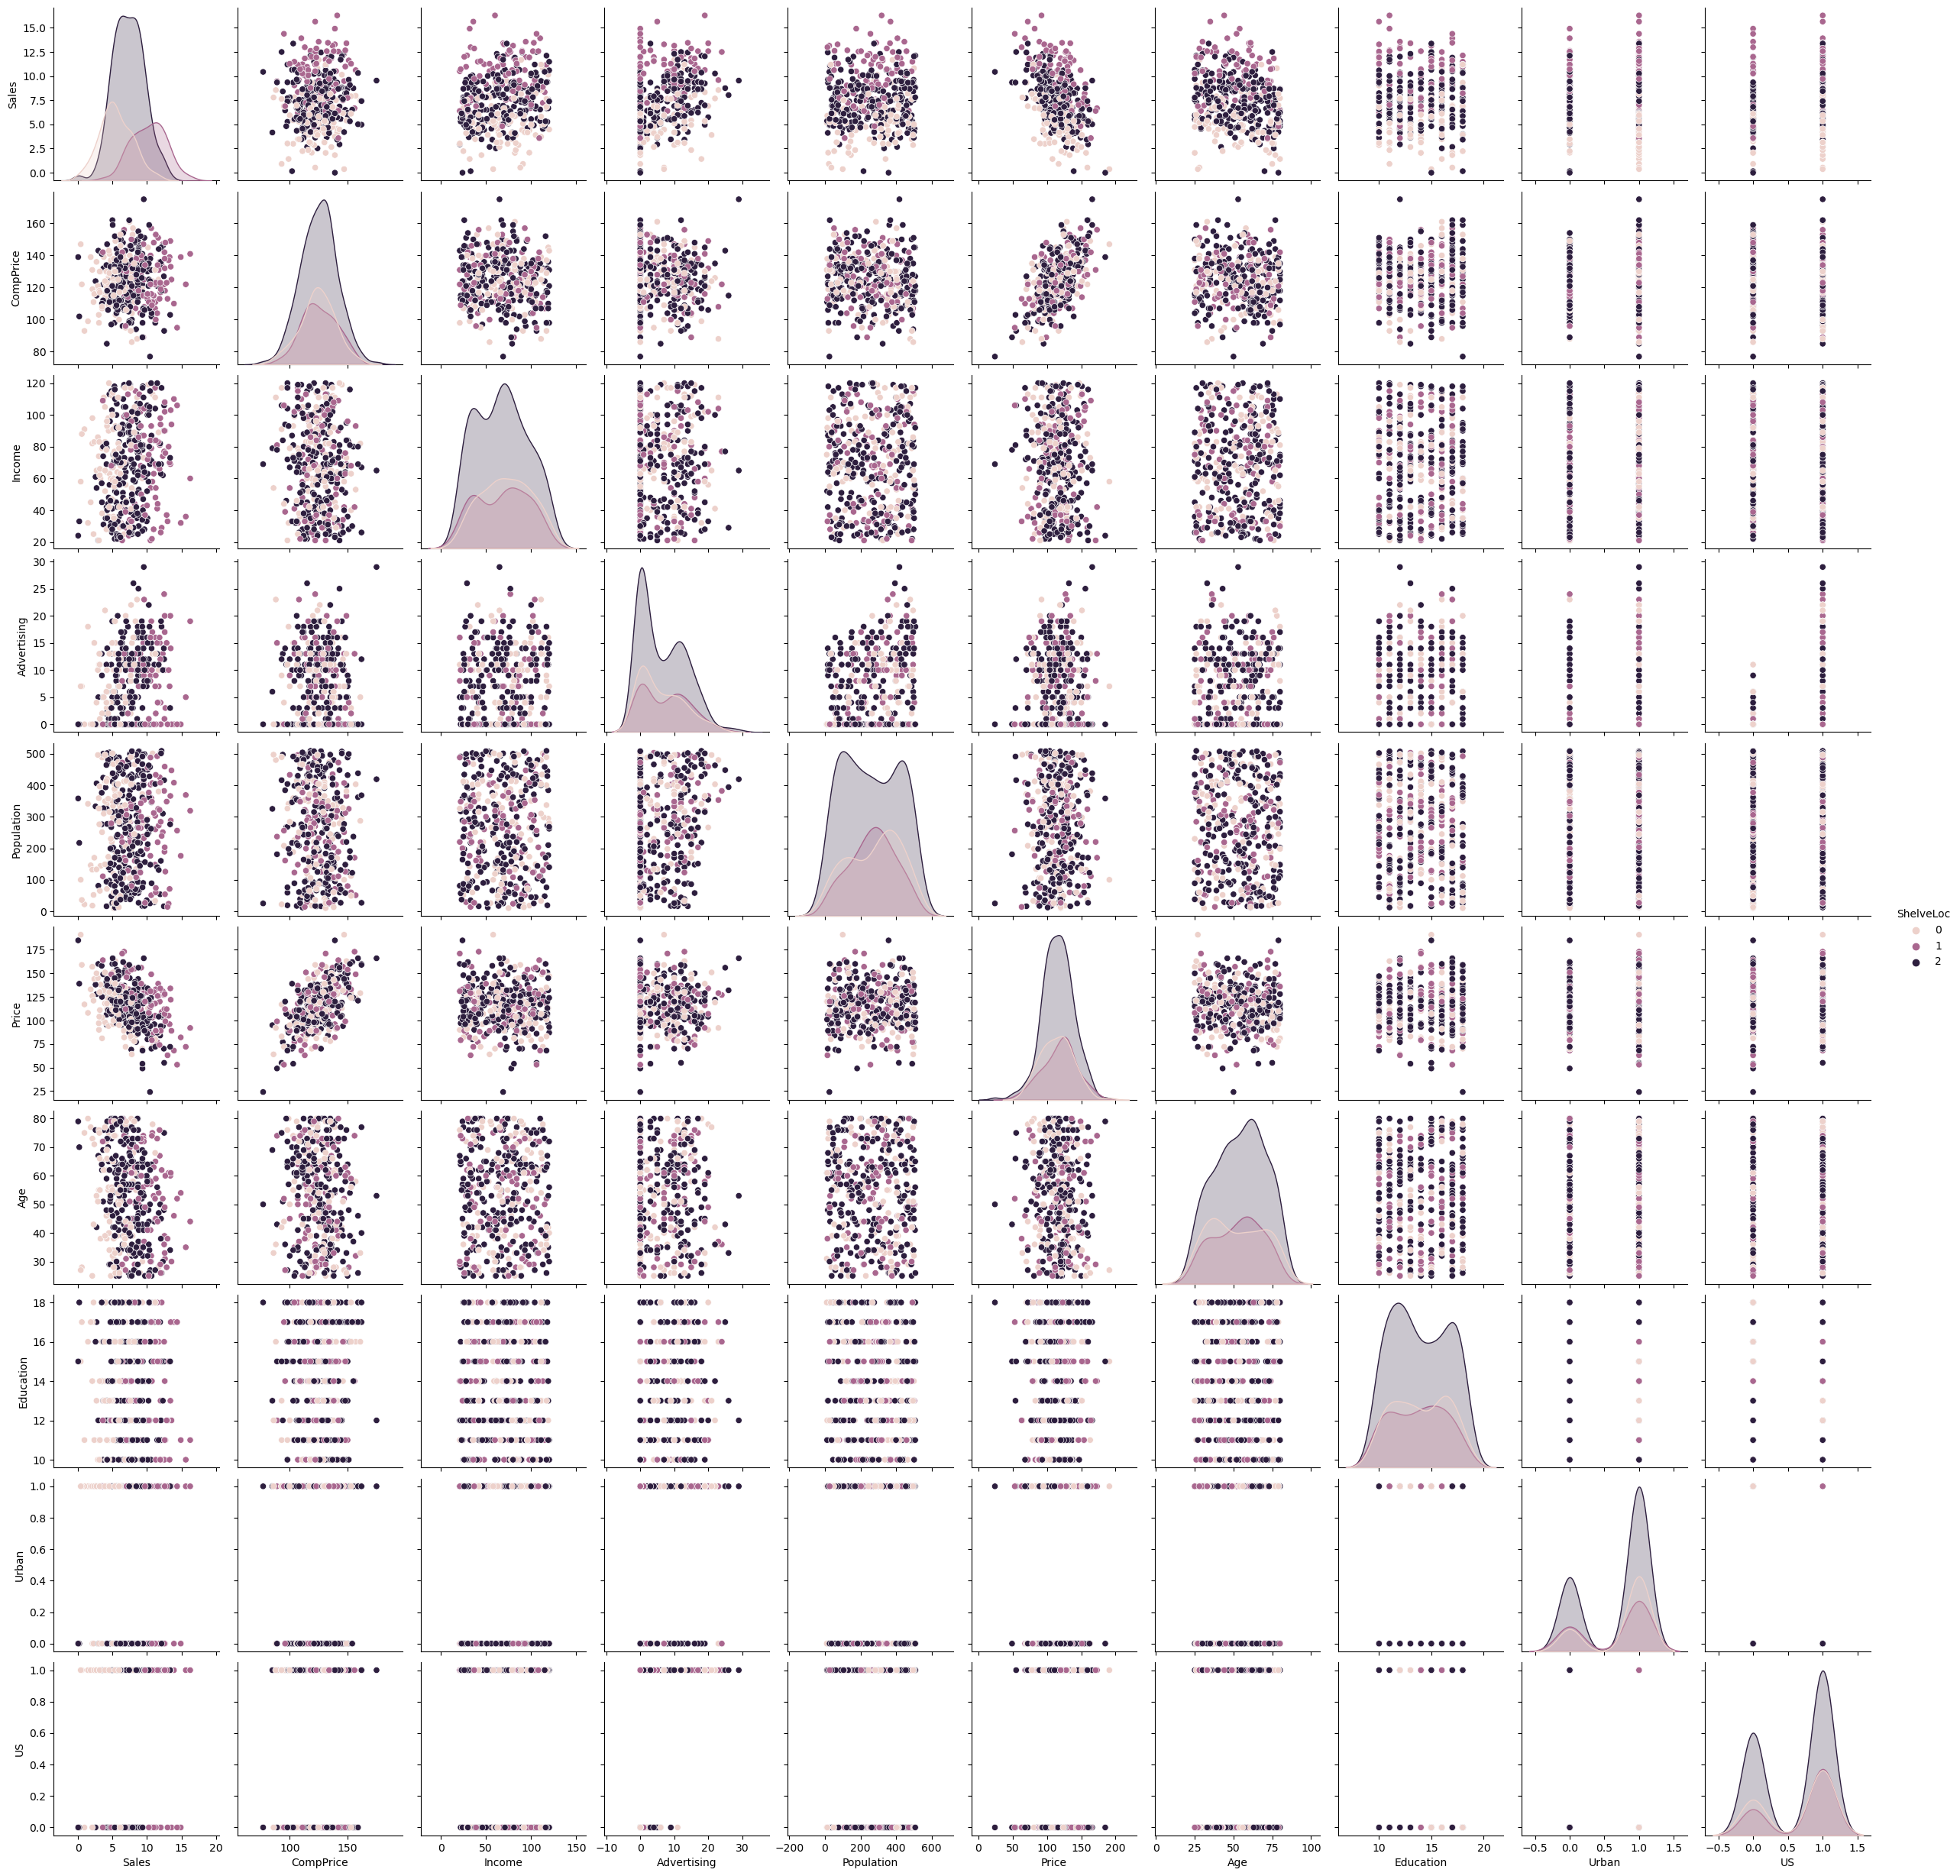

In [109]:
sns.pairplot(data=company, hue = 'ShelveLoc')

In [12]:
x=company.iloc[:,0:6]
y=company["ShelveLoc"]

In [13]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [14]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [16]:
company['ShelveLoc'].unique()

array([0, 1, 2])

In [23]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [25]:
columns=list(company.columns)
columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [26]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [27]:
# Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

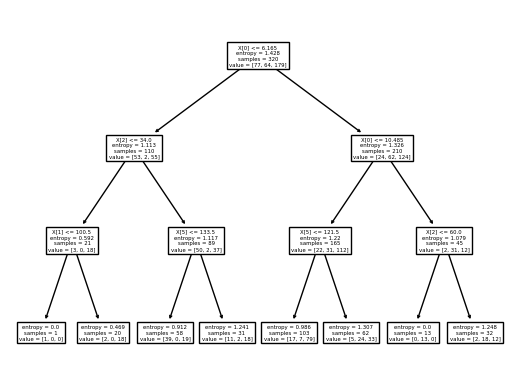

In [31]:
tree.plot_tree(model);

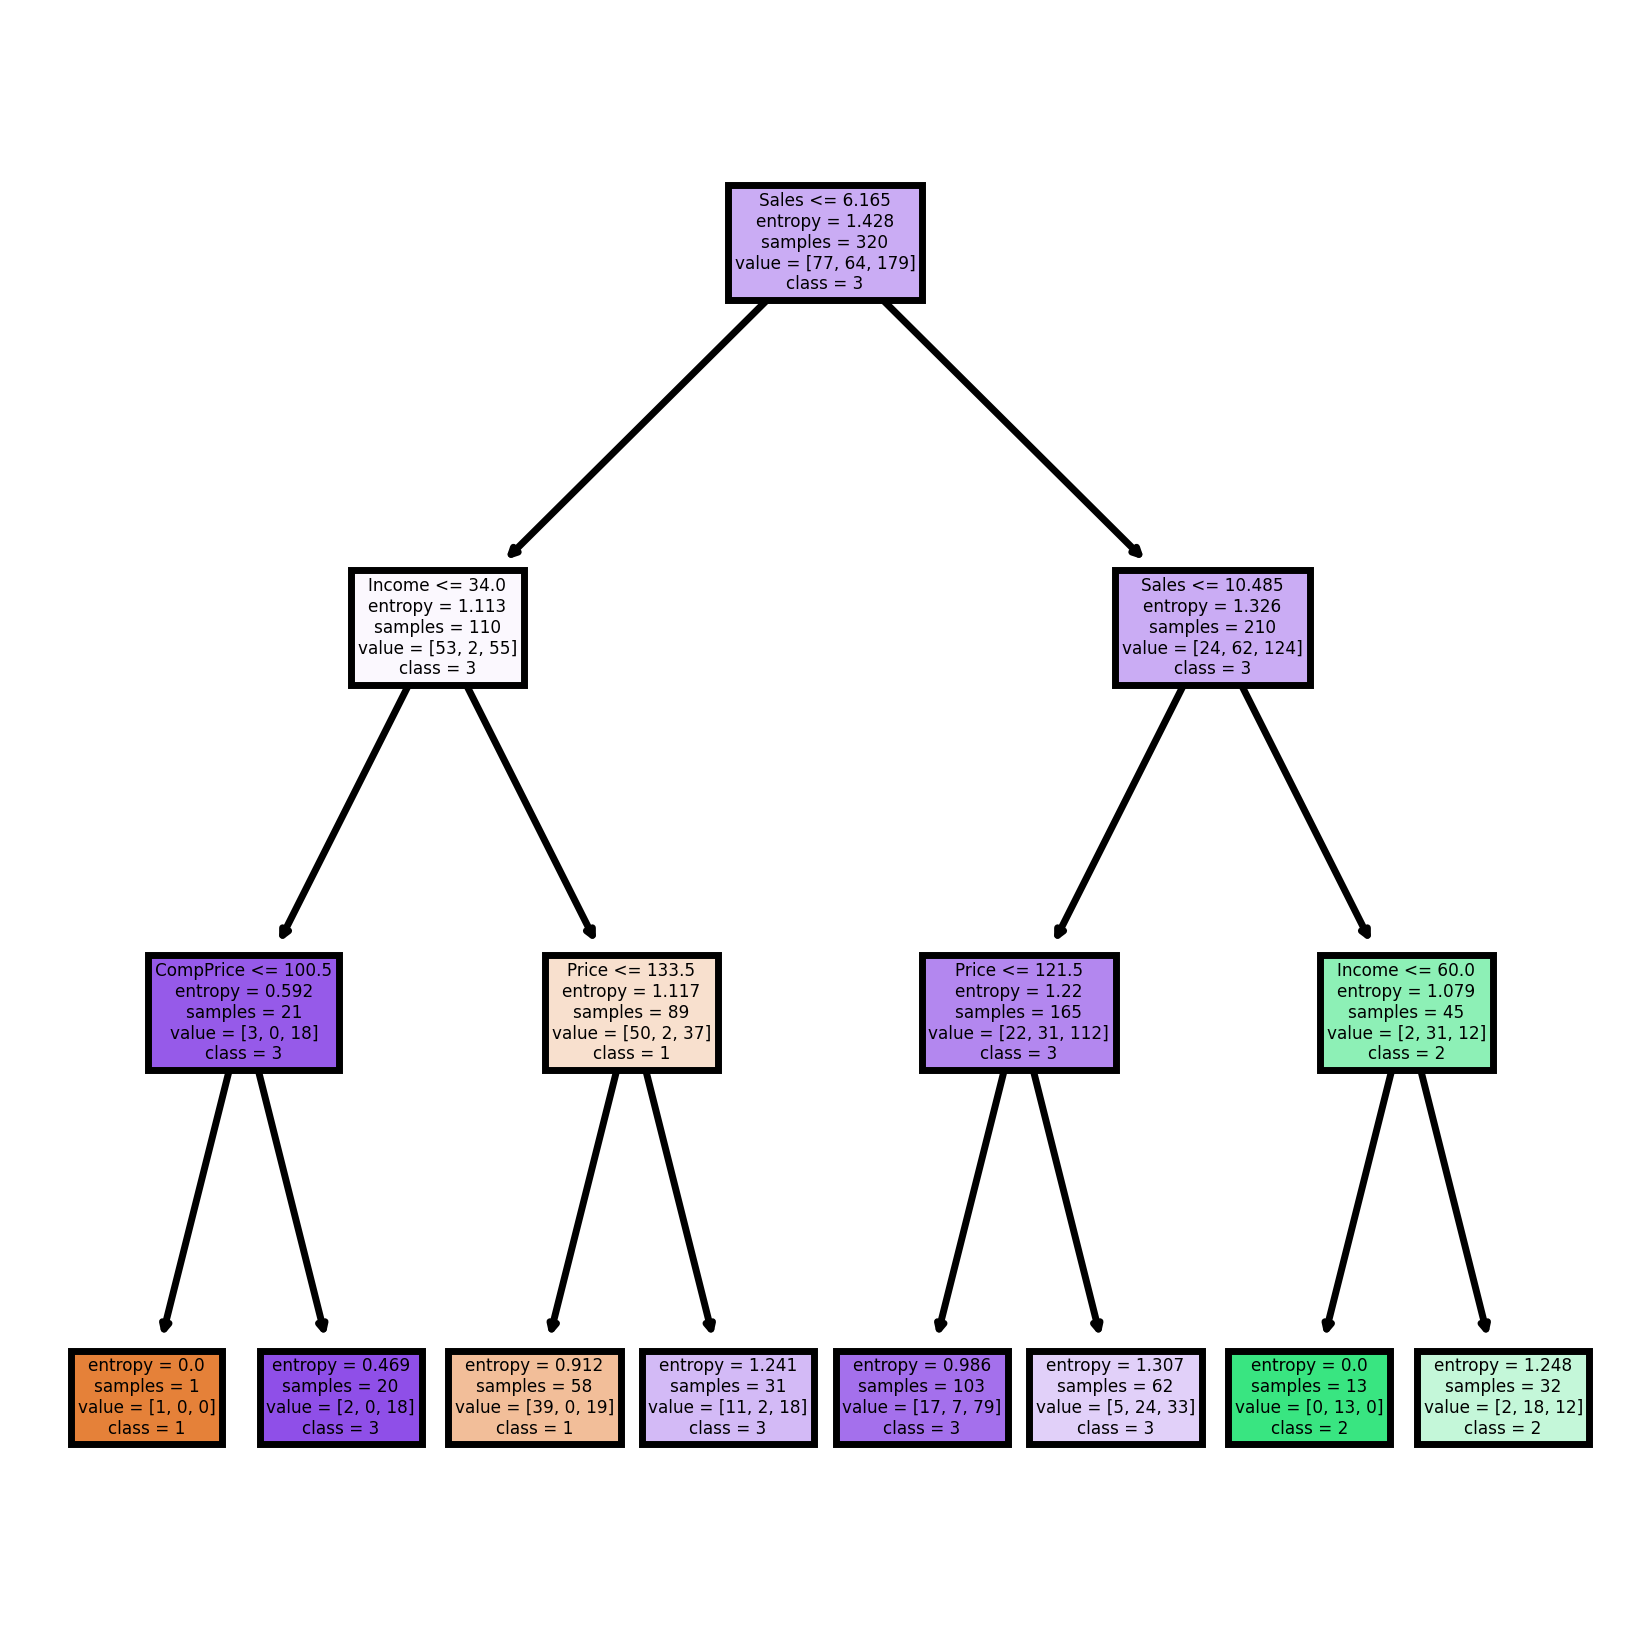

In [33]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_0 <= 6.16
|   |--- feature_2 <= 34.00
|   |   |--- feature_1 <= 100.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  100.50
|   |   |   |--- class: 2
|   |--- feature_2 >  34.00
|   |   |--- feature_5 <= 133.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  133.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.48
|   |   |--- feature_5 <= 121.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  121.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.48
|   |   |--- feature_2 <= 60.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  60.00
|   |   |   |--- class: 1



In [36]:
model.feature_importances_ 

array([0.6334972 , 0.02280011, 0.14363525, 0.        , 0.        ,
       0.20006744])

In [37]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.633497
Price          0.200067
Income         0.143635
CompPrice      0.022800
Advertising    0.000000
Population     0.000000
dtype: float64

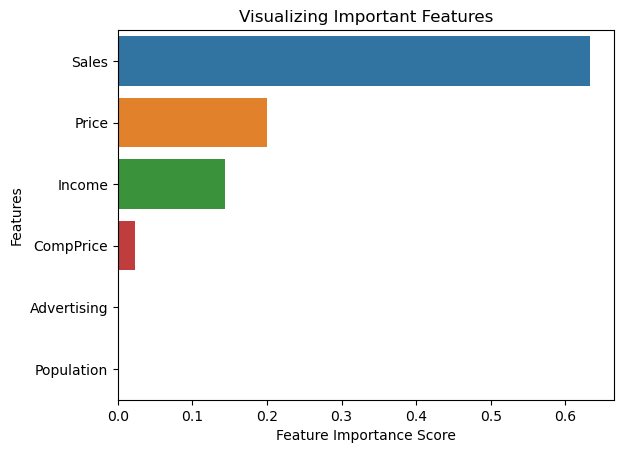

In [39]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [45]:
# predictions 
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

2    51
1    17
0    12
dtype: int64

In [46]:
preds

array([0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,4,1,14
1,0,13,8
2,8,3,29


In [48]:
# Accuracy 
np.mean(preds==y_test)

0.575

In [50]:
# Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [51]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [52]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.575

In [53]:
model.feature_importances_ 

array([0.6334972 , 0.02280011, 0.14363525, 0.        , 0.        ,
       0.20006744])

In [54]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [56]:
array = company.values
X = array[:,0:3] 
y = array[:,3] 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)   

In [106]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)    

DecisionTreeRegressor(max_depth=3)

In [107]:
#testing accuracy
model.score(X_test,y_test)     

-0.8285047284397462

In [108]:
#training accuracy
model.score(X_train, y_train)  

0.895310892489712